In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [68]:
df=pd.read_csv('/content/diabetes.csv')
print(df)

    gender  age  hypertension  heart_disease smoking_history    bmi  \
0   Female   80           130              1           never  25.19   
1   Female   54            80              0         No Info  27.32   
2     Male   28            85              0           never  27.32   
3   Female   36            90              0         current  23.45   
4     Male   76           120              1         current  20.14   
5   Female   89           140              0           never  27.32   
6   Female   44            82              0           never  19.31   
7   Female   79           130              0         No Info  23.86   
8     Male   42            87              0           never  33.64   
9   Female   32            84              0           never  27.32   
10  Female   80           100              1           never  25.19   
11  Female   94           145              0         No Info  27.32   
12    Male   70           120              0           never  27.32   
13  Fe

In [69]:
h=df.head(10)
t=df.tail(10)

In [70]:
print(df.shape)

(20, 9)


In [71]:
for i in range(1,20,-1):
  df.drop([i],axis=0,inplace=True)

In [72]:
for i in range(9):
  df.drop([i],axis=0,inplace=True)

In [73]:
dfmt=pd.concat([h,t],axis=0)
dfmt.to_csv("test_file.csv")
data=pd.read_csv('/content/test_file.csv')
print(data)

    Unnamed: 0  gender  age  hypertension  heart_disease smoking_history  \
0            0  Female   80           130              1           never   
1            1  Female   54            80              0         No Info   
2            2    Male   28            85              0           never   
3            3  Female   36            90              0         current   
4            4    Male   76           120              1         current   
5            5  Female   89           140              0           never   
6            6  Female   44            82              0           never   
7            7  Female   79           130              0         No Info   
8            8    Male   42            87              0           never   
9            9  Female   32            84              0           never   
10          10  Female   80           100              1           never   
11          11  Female   94           145              0         No Info   
12          

In [74]:
X=dfmt['age']
y=dfmt['hypertension']
z=dfmt['heart_disease']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
z_train, z_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=42)


In [77]:
X_train=np.array(X_train)
y_train=np.array(y_train)
z_train=np.array(z_train)

In [85]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
z_train=z_train.reshape(-1,1)

In [79]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [80]:
model1=LinearRegression()
model1.fit(z_train,z_train)

LinearRegression()

In [87]:
X_test=np.array(X_test)
z_test=np.array(z_test)

In [88]:
X_test=X_test.reshape(-1)
z_test=z_test.reshape(-1)

In [89]:
X_test=pd.Series(X_test)
z_test=pd.Series(z_test)

In [90]:
X_test=X_test.values.reshape(-1,1)
z_test=z_test.values.reshape(-1,1)

In [91]:
y_predict=model.predict(X_test)
yz_predict=model1.predict(z_test)

In [92]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 145.79705484104218


In [93]:
data.isnull().sum()

Unnamed: 0             0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: xlabel='heart_disease', ylabel='count'>

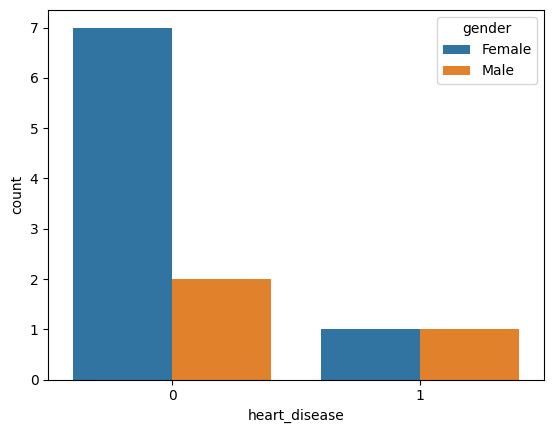

In [94]:
sns.countplot(data=df,x='heart_disease',hue='gender',linewidth=1)

<ipython-input-95-b4b1a8da4549>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=data.corr()


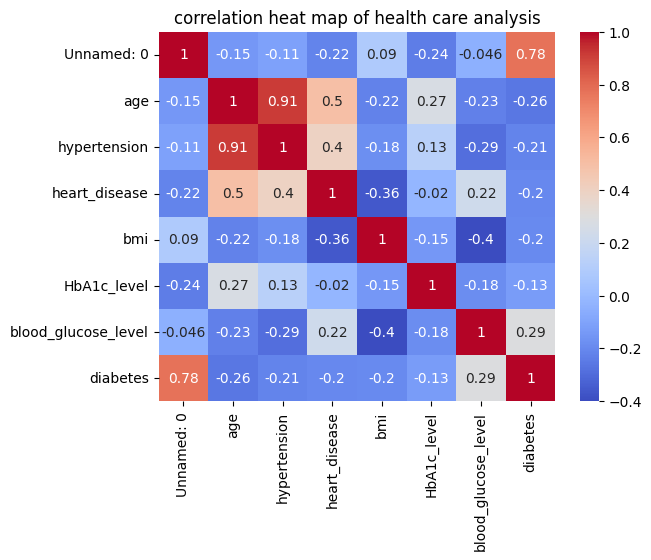

In [95]:
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("correlation heat map of health care analysis")
plt.show()

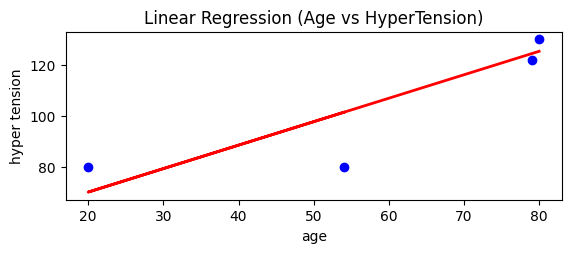

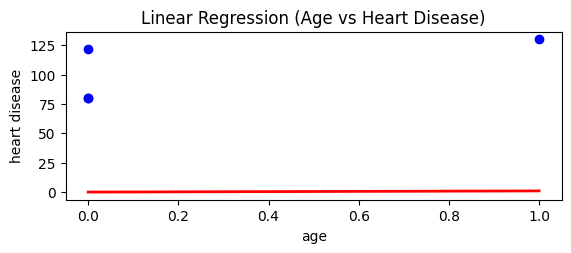

In [96]:
import seaborn as sns
plt.subplot(2,1,1)
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,y_predict,color='red',linewidth=2)
plt.xlabel("age")
plt.ylabel("hyper tension")
plt.title("Linear Regression (Age vs HyperTension)")
plt.show()
plt.subplot(2,1,2)
plt.scatter(z_test,y_test,color='blue')
plt.plot(z_test,yz_predict,color='red',linewidth=2)
plt.xlabel("age")
plt.ylabel("heart disease")
plt.title("Linear Regression (Age vs Heart Disease)")
plt.show()

In [99]:
from sklearn.linear_model import LinearRegression
# Assuming X_train and y_train are your training features and labels

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Read the Age of a person from the console
age = float(input("Enter the Age:"))

# Prepare the feature vector for prediction
X_test = [[age]]

# Make prediction for Hyper tension
predicted_HT = model.predict(X_test)

# Print the predicted Hypertension
print("predicted Hyper Tension:", predicted_HT )

if(predicted_HT >= 130 or predicted_HT <80):
  print("You may have Heart Disease")
else:
  print("You may not have Heart Disease")

Enter the Age:90
predicted Hyper Tension: [[134.52648532]]
You may have Heart Disease
